In [61]:
sns.distributions._has_statsmodels=False

import pandas as pd
import numpy as np
import string
import math
import os
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import statsmodels
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
%matplotlib inline

from subprocess import check_output

os.chdir('/Users/pawanshivhare/Desktop/fbprep/class')
print(check_output(["ls","../class"]).decode("utf8"))

test_66516Ee.csv
train_ZoGVYWq.csv



In [62]:
data=pd.read_csv('train_ZoGVYWq.csv')

print(data.shape)
num_cols=data._get_numeric_data().columns.tolist()
cat_cols=list(set(data.columns)-set(num_cols))

print(num_cols)
print(cat_cols)

redun_num_cols=['Id']
redun_cat_cols=['']

data.head()

(79853, 13)
['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium', 'renewal']
['residence_area_type', 'sourcing_channel']


,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [63]:
data['renewal'].value_counts()/data.shape[0]

1    0.93741
0    0.06259
Name: renewal, dtype: float64

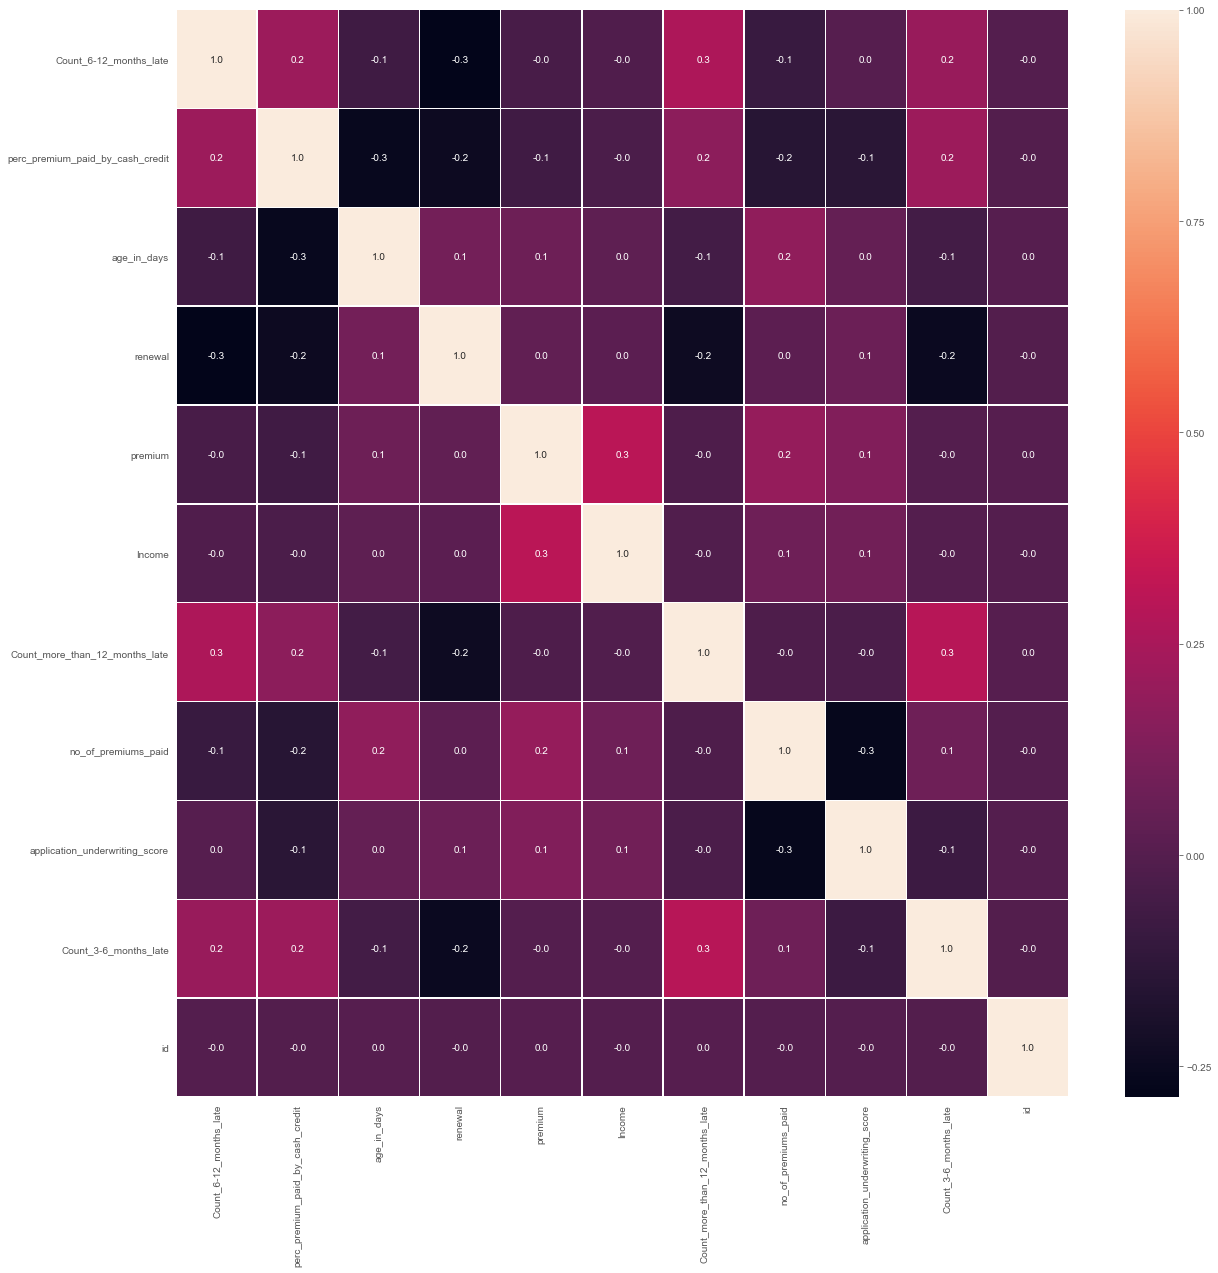

In [64]:
corrset=list(set(num_cols)-set(redun_num_cols))
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data[corrset].corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)

In [65]:
th=0.2
impvars=data[corrset].corr()['renewal'].loc[(data[corrset].corr()['renewal'] >= th) |
                                   (data[corrset].corr()['renewal'] <= -1*th)].index.tolist()

impvars=list(set(impvars)-set(['renewal']))
print(impvars)

['Count_6-12_months_late', 'perc_premium_paid_by_cash_credit', 'Count_3-6_months_late', 'Count_more_than_12_months_late']


In [66]:
data[num_cols].describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


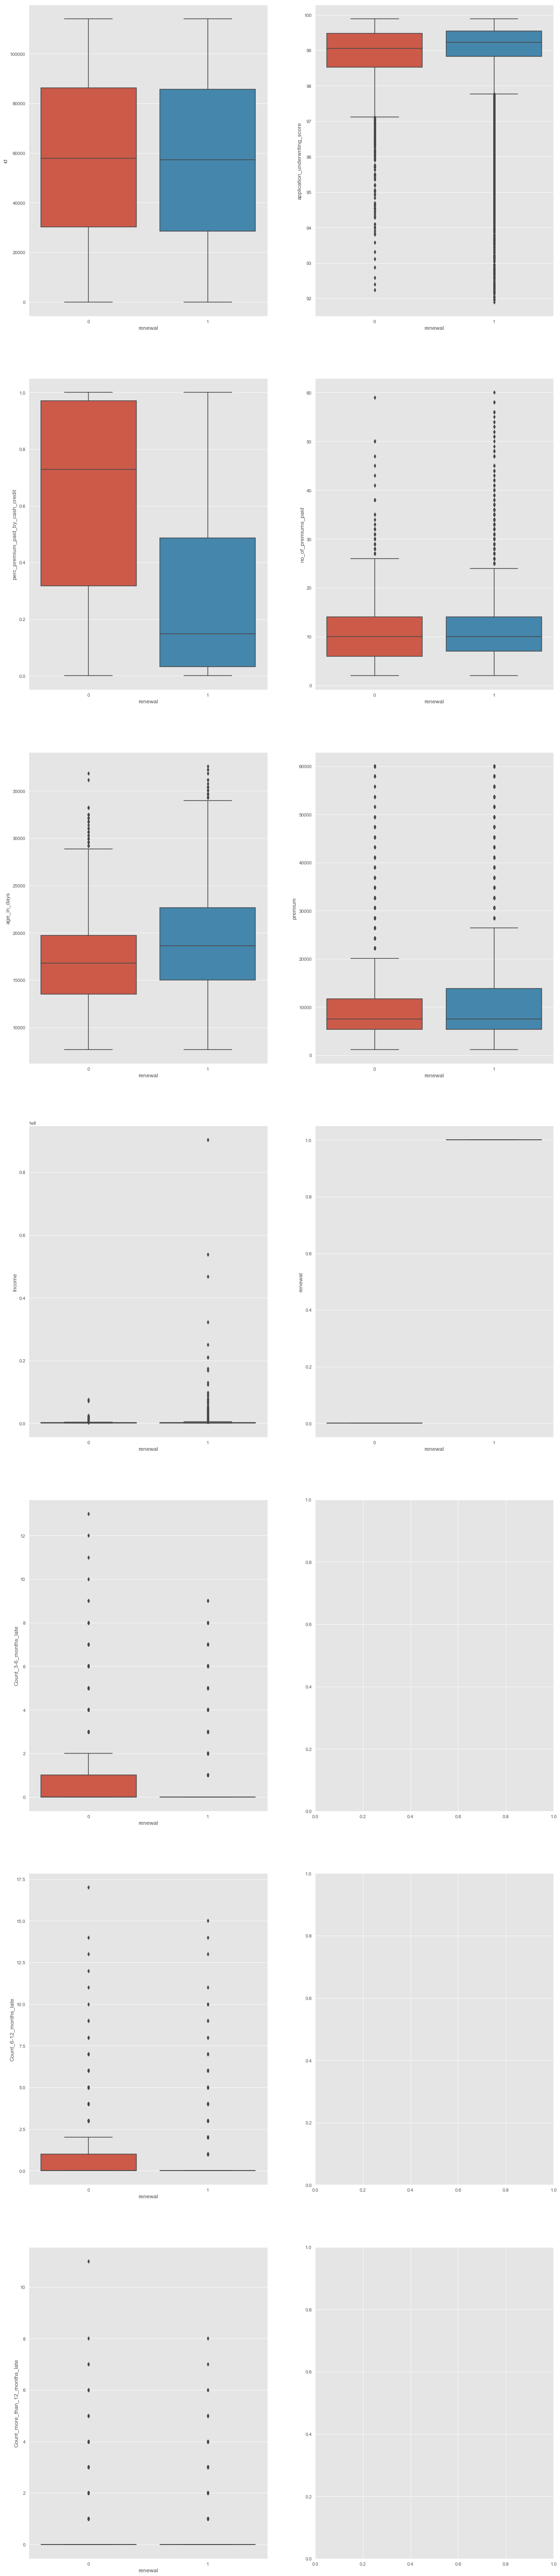

In [67]:
fig, axes =plt.subplots(figsize=(20,100),nrows=round(len(num_cols)/2)+1,ncols=2)
i=0
j=0
for item in num_cols:
    sns.boxplot(x=data['renewal'],y=data[item],ax=axes[i,j])
    if i==round(len(num_cols)/2):
        i=0
        j=1
    else:
        i=i+1

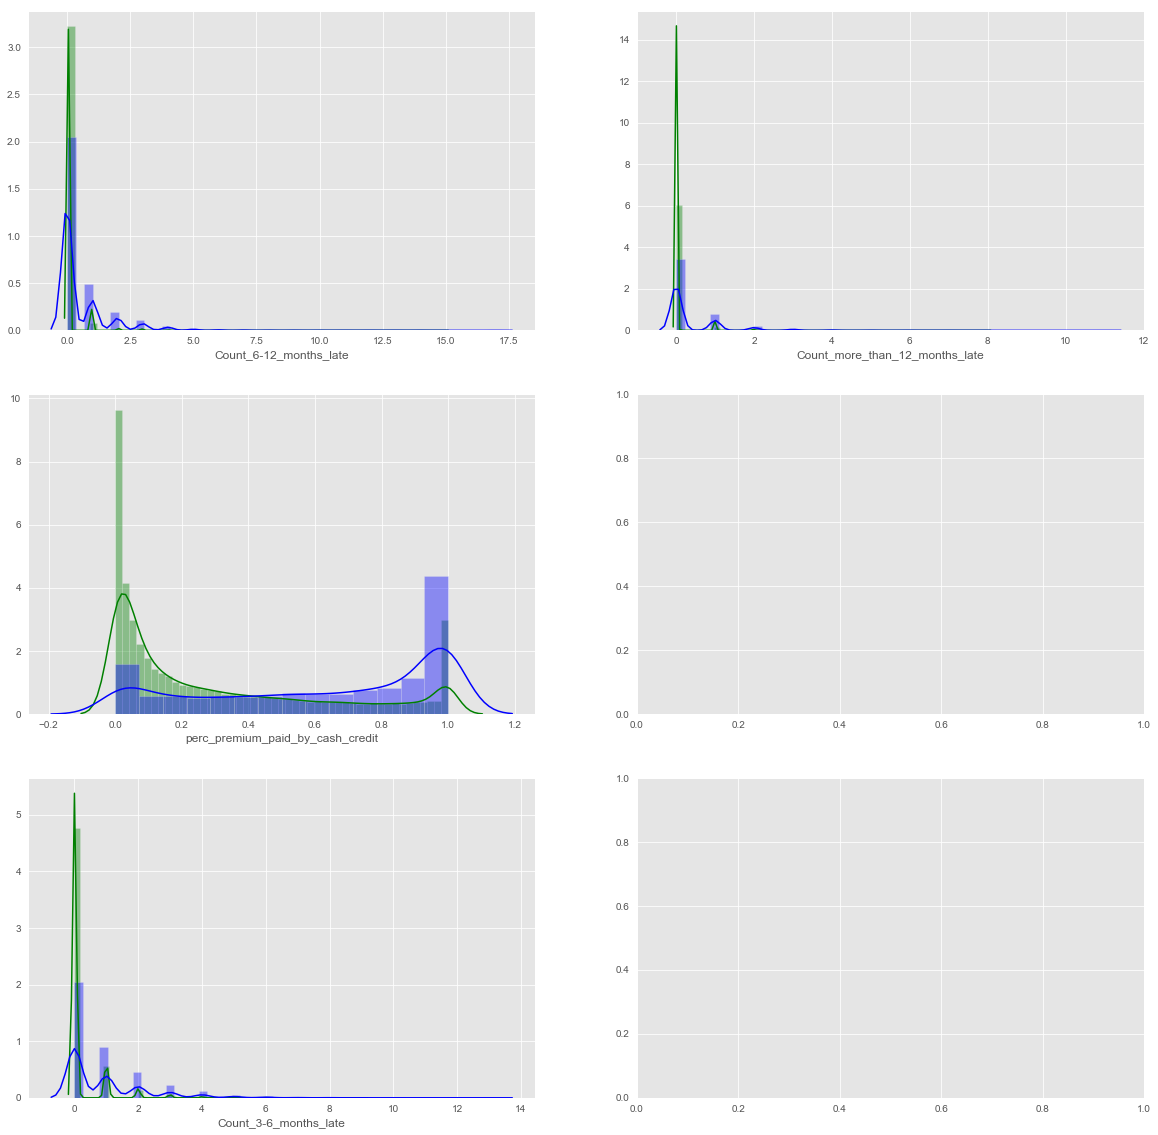

In [68]:
fig , axes = plt.subplots(figsize=(20,20),nrows=round(len(impvars)/2)+1, ncols=2)
i=0
j=0
for item in impvars:
    sns.distplot(data.loc[(data['renewal']==1)][item].dropna(),color="green", ax=axes[i,j])
    sns.distplot(data.loc[(data['renewal']==0)][item].dropna(),color="blue", ax=axes[i,j])
    if i == round(len(impvars)/2):
        i=0
        j=1
    else:
        i=i+1

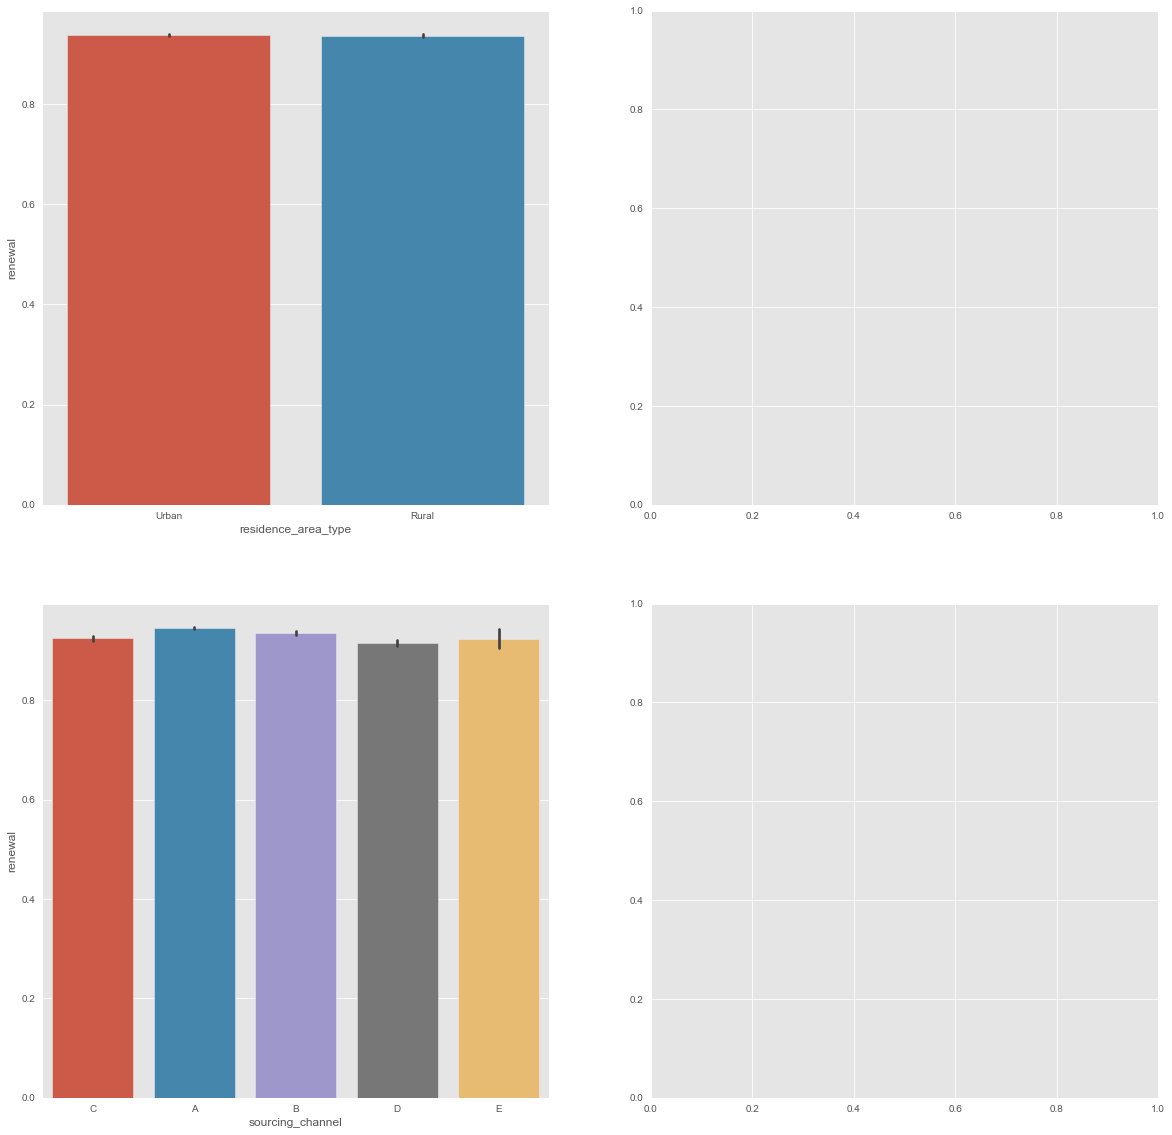

In [69]:
fig, axes= plt.subplots(figsize=(20,20),nrows=round(len(cat_cols)/2)+1, ncols=2)
i=0
j=0
for item in cat_cols:
    sns.barplot(x=item, y='renewal',data=data, ax=axes[i,j])
    if i== round(len(cat_cols)/2):
        i=0
        j=1
    else:
        i=i+1

In [70]:
def missing(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
    temp=pd.concat([total,percent],axis=1,keys=["total","percent"])
    return temp[temp["total"]> 0]
missing(data)

,total,percent
application_underwriting_score,2974,0.037243
Count_more_than_12_months_late,97,0.001215
Count_6-12_months_late,97,0.001215
Count_3-6_months_late,97,0.001215


In [71]:
data[(data["Count_more_than_12_months_late"].isnull())]['renewal'].value_counts()

0    60
1    37
Name: renewal, dtype: int64

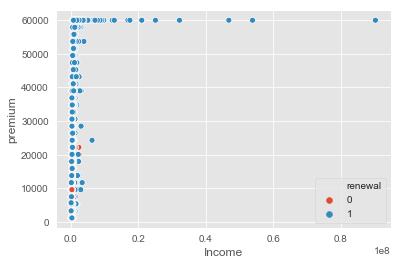

In [72]:
def scale(var):
    scale=(var-var.mean())/var.std()
    outlier=((scale > 3)|(scale < -3)).astype(int)
    return outlier
d1=data
d1['outlier']=scale(data['Count_more_than_12_months_late'])
sns.scatterplot(x='Income',y="premium", hue='renewal', data=d1)

In [73]:
print(data['application_underwriting_score'].mean())
print(data[(data['perc_premium_paid_by_cash_credit']==1)]['Count_more_than_12_months_late'].mean())
print(data[(data['perc_premium_paid_by_cash_credit']==1)]['Count_6-12_months_late'].mean())
print(data[(data['perc_premium_paid_by_cash_credit']==1)]['Count_3-6_months_late'].mean())

data['application_underwriting_score']=data['application_underwriting_score'].fillna(99.06729119785817)
data['Count_more_than_12_months_late']=data['Count_more_than_12_months_late'].fillna(0.1630324026900348)
data['Count_6-12_months_late']=data['Count_6-12_months_late'].fillna(0.44059506826981865)
data['Count_3-6_months_late']=data['Count_3-6_months_late'].fillna(0.3513348277970247)
data['total_late']=data['Count_more_than_12_months_late']+data['Count_6-12_months_late']+data['Count_3-6_months_late']
data['atleast_1late']=np.where(data['total_late'] > 0,1,-1)
data['perg50']=np.where(data['perc_premium_paid_by_cash_credit'] > 0.5,1,-1)
data['total_prem']=data['no_of_premiums_paid']*data['premium']
data['prem_inc_ratio']=data['premium']/data['Income']
data['incg1']=np.where(data['Income']> 10000000,1,-1)

                       
for item in cat_cols:
    dummies=pd.get_dummies(data[item],prefix=item)
    data=pd.concat([data,dummies],axis=1)


99.06729119785102
0.16303240269003463
0.44059506826981865
0.3513348277970247


In [74]:
exclu=['id', 'sourcing_channel','residence_area_type','outlier']
label=['renewal']


#['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 
# 'application_underwriting_score', 'no_of_premiums_paid', 'premium', 'renewal']
#['sourcing_channel', 'residence_area_type']


features=list(set(data.columns.tolist())-set(exclu)-set(label))
print(features)


['Count_6-12_months_late', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'sourcing_channel_B', 'total_prem', 'total_late', 'Count_more_than_12_months_late', 'prem_inc_ratio', 'residence_area_type_Urban', 'Count_3-6_months_late', 'atleast_1late', 'sourcing_channel_C', 'perg50', 'premium', 'sourcing_channel_D', 'Income', 'no_of_premiums_paid', 'residence_area_type_Rural', 'application_underwriting_score', 'sourcing_channel_E', 'sourcing_channel_A', 'incg1']


In [75]:
from sklearn.preprocessing import StandardScaler

scale1=StandardScaler().fit(data[features])
dftrain=scale1.transform(data[features])
lab=np.array(data[label]).flatten()

print(dftrain.shape)
print(lab.shape)

(79853, 22)
(79853,)


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(dftrain,lab,test_size=0.3,random_state=123)


print(X_train.shape)
print(X_test.shape)
print(sum(y_train)/len(y_train))
print(sum(y_test)/len(y_test))

(55897, 22)
(23956, 22)
0.9375816233429344
0.9370095174486559


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

params={'n_estimators':[11],
       'max_depth':[7] }
m1=GridSearchCV(RandomForestClassifier(),params, cv=5, n_jobs=5,scoring='f1',return_train_score=False)
m1.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [78]:
print(m1.best_score_)
print(m1.best_params_)
print(m1.cv_results_)

0.9685787996152818
{'max_depth': 7, 'n_estimators': 11}
{'mean_fit_time': array([2.18146815]), 'std_fit_time': array([0.18858494]), 'mean_score_time': array([0.06032228]), 'std_score_time': array([0.0171908]), 'param_max_depth': masked_array(data=[7],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[11],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 7, 'n_estimators': 11}], 'split0_test_score': array([0.96813748]), 'split1_test_score': array([0.96892105]), 'split2_test_score': array([0.96853828]), 'split3_test_score': array([0.96910946]), 'split4_test_score': array([0.96818772]), 'mean_test_score': array([0.9685788]), 'std_test_score': array([0.0003868]), 'rank_test_score': array([1], dtype=int32)}


In [79]:
train_pred=m1.predict(X_train).flatten()
train_pred_score=m1.predict_proba(X_train)[:,1].flatten()
test_pred=m1.predict(X_test).flatten()
test_pred_score=m1.predict_proba(X_test)[:,1].flatten()

In [80]:
print('Train accuracy score: %f' % accuracy_score(y_train,train_pred))
print('Train f1 score: %f' % f1_score(y_train,train_pred))
print(classification_report(y_train,train_pred))

Train accuracy score: 0.942394
Train f1 score: 0.970138
              precision    recall  f1-score   support

           0       0.78      0.11      0.19      3489
           1       0.94      1.00      0.97     52408

    accuracy                           0.94     55897
   macro avg       0.86      0.55      0.58     55897
weighted avg       0.93      0.94      0.92     55897



In [81]:
print('Test accuracy score: %f' % accuracy_score(y_test,test_pred))
print('Test f1 score: %f' % f1_score(y_test,test_pred))
print(classification_report(y_test,test_pred))

Test accuracy score: 0.939013
Test f1 score: 0.968366
              precision    recall  f1-score   support

           0       0.61      0.09      0.15      1509
           1       0.94      1.00      0.97     22447

    accuracy                           0.94     23956
   macro avg       0.78      0.54      0.56     23956
weighted avg       0.92      0.94      0.92     23956



In [82]:
params={'C':[0.02]}
m2=GridSearchCV(LogisticRegression(penalty='l2'),params,cv=5,n_jobs=5,return_train_score=False,scoring='f1')
m2.fit(X_train,y_train)

print(m2.best_score_)
print(m2.best_params_)
print(m2.cv_results_)

0.968580348451044
{'C': 0.02}
{'mean_fit_time': array([0.47618093]), 'std_fit_time': array([0.03658955]), 'mean_score_time': array([0.01002622]), 'std_score_time': array([0.001535]), 'param_C': masked_array(data=[0.02],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.02}], 'split0_test_score': array([0.96806879]), 'split1_test_score': array([0.96898505]), 'split2_test_score': array([0.96886038]), 'split3_test_score': array([0.96889797]), 'split4_test_score': array([0.96808955]), 'mean_test_score': array([0.96858035]), 'std_test_score': array([0.00041126]), 'rank_test_score': array([1], dtype=int32)}


In [83]:
train_pred=m2.predict(X_train).flatten()
train_pred_score=m2.predict_proba(X_train)[:,1].flatten()
test_pred=m2.predict(X_test).flatten()
test_pred_score=m2.predict_proba(X_test)[:,1].flatten()

In [84]:
print('Train accuracy score: %f' % accuracy_score(y_train,train_pred))
print('Train f1 score: %f' % f1_score(y_train,train_pred))
print(classification_report(y_train,train_pred))

Train accuracy score: 0.939424
Train f1 score: 0.968543
              precision    recall  f1-score   support

           0       0.58      0.11      0.18      3489
           1       0.94      0.99      0.97     52408

    accuracy                           0.94     55897
   macro avg       0.76      0.55      0.58     55897
weighted avg       0.92      0.94      0.92     55897



In [85]:
print('test accuracy score: %f' % accuracy_score(y_test,test_pred))
print('test f1 score: %f' % f1_score(y_test,test_pred))
print(classification_report(y_test,test_pred))

test accuracy score: 0.939681
test f1 score: 0.968658
              precision    recall  f1-score   support

           0       0.61      0.12      0.20      1509
           1       0.94      0.99      0.97     22447

    accuracy                           0.94     23956
   macro avg       0.78      0.56      0.58     23956
weighted avg       0.92      0.94      0.92     23956



/Users/pawanshivhare/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


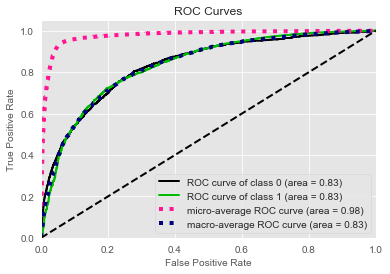

In [102]:
import scikitplot as skplt
skplt.metrics.plot_roc_curve(y_test, m2.predict_proba(X_test))
plt.show()

In [96]:
test_pred_score.shape

(23956,)